In [1]:
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2lab, lab2rgb

from sklearn.model_selection import train_test_split

In [2]:
print('hello')

hello


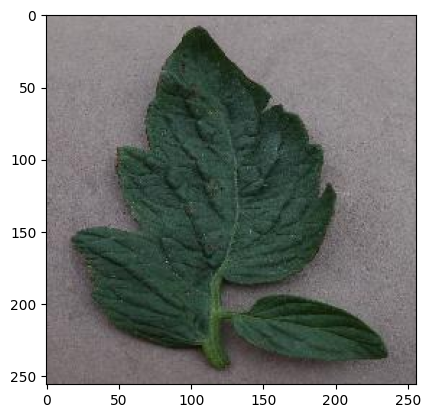

In [3]:
im = imread('tomato/colour/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG')
plt.imshow(im)

In [4]:
IMG_WIDHT = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3

In [5]:
base_dir = "tomato/segmented/"

sub_dirs = next(os.walk(base_dir))[1]
des_dir = "tomato/segmented_bw/"
sub_dirs

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [6]:
def create_seg_bw(img):
    img = img.convert('L')
    img = img.point(lambda x:255 if x>0 else 0, '1')
    img = np.array(img)
    img = img.astype(np.uint8)

    kernel_size = 5
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    # Erosion
    eroded_image = cv2.erode(img, kernel, iterations=2)
    result = cv2.normalize(eroded_image, dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    # img = Image.fromarray(eroded_image)
    return result

(256, 256)

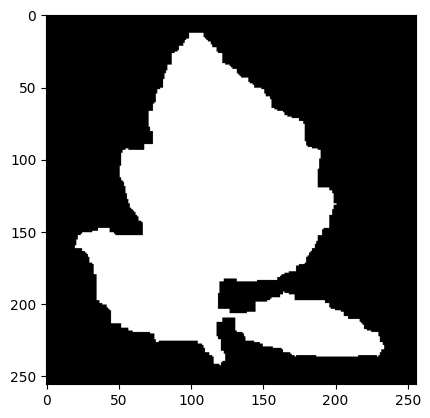

In [7]:
# os.listdir('tomato/segmented/Tomato___Bacterial_spot/'+'/')
image = Image.open('tomato/segmented/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110_final_masked.jpg')
image = create_seg_bw(image)
# image.save(des_dir+sub_dir+'/'+img_name)
plt.imshow(image,cmap='gray')
image.shape
# print(image.dtype())
# result = cv2.normalize(image, dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
# cv2.imwrite(base_dir+'new_pls_work_2.jpg', image)

In [8]:
for sub_dir in tqdm(sub_dirs, total=len(sub_dirs)):
    img_list = os.listdir(base_dir+sub_dir+'/')
    for img_name in tqdm(img_list, total=len(img_list)):
        image = Image.open(base_dir+sub_dir+'/'+img_name)
        image = create_seg_bw(image)
        # image.save(des_dir+sub_dir+'/'+img_name)
        cv2.imwrite(des_dir+sub_dir+'/'+img_name, image)
        

100%|██████████| 10/10 [00:26<00:00,  2.61s/it]


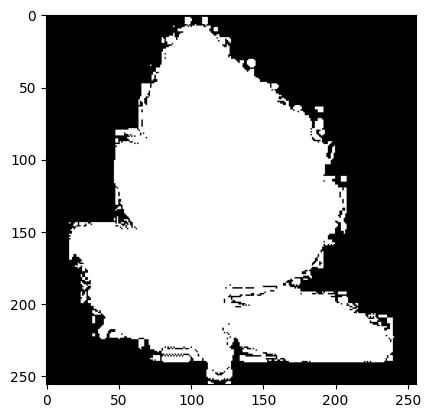

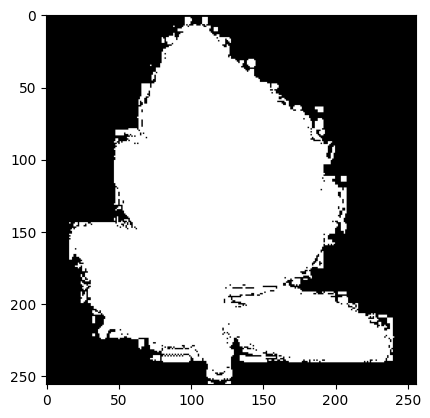

In [121]:


img = Image.open('tomato/segmented/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110_final_masked.jpg')
plt.imshow(img)
img = img.convert('L')
plt.imshow(img)
img2 = img.resize((1024,1024))
# img = resize(img,(1024,1024,3),mode='constant', preserve_range=True)
img = img.point(lambda x:255 if x>0 else 0, '1')
img2 = img2.point(lambda x:255 if x>0 else 0, '1')
img2 = img2.resize((256,256))
# arr = np.asarray(img).copy
# arr[arr > 0] = 255 # change everything to white where pixel is not black
# img = Image.fromarray(arr)
plt.imshow(img)
plt.show()
plt.imshow(img2)


C:\Users\I741666\AppData\Local\Temp\ipykernel_21892\2318886047.py:30: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)


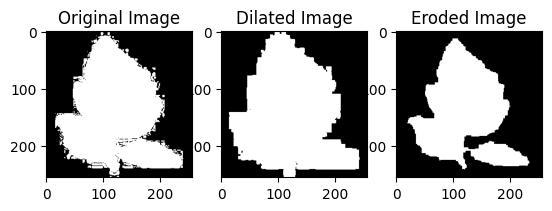

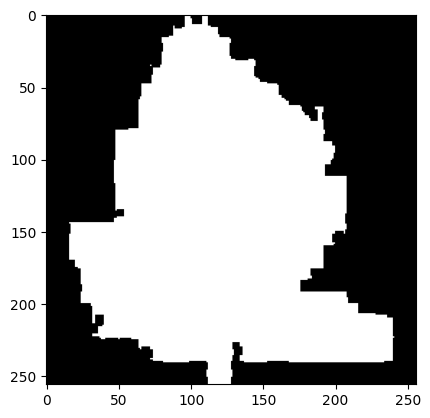

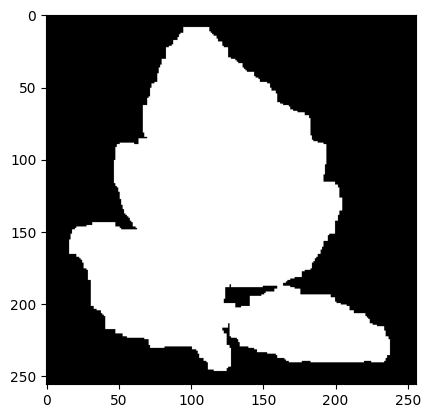

In [160]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your image (replace 'your_image.jpg' with your image file)
image = cv2.imread('tomato/colour/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG', cv2.IMREAD_GRAYSCALE)
image = Image.open('tomato/segmented/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110_final_masked.jpg')
plt.imshow(image)
plt.show
image = image.convert('L')
image = image.point(lambda x:255 if x>0 else 0, '1')

image = np.array(image)

# numpy_array = np.array(pil_image)

# Ensure that the array has the correct data type (uint8)
image = image.astype(np.uint8)
# Define a kernel for dilation and erosion
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Dilation
dilated_image = cv2.dilate(image, kernel, iterations=1)

# Erosion
eroded_image = cv2.erode(image, kernel, iterations=2)

# Visualize the original, dilated, and eroded images
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')

plt.subplot(1, 3, 3)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')

plt.show()

plt.imshow(cv2.erode(dilated_image,kernel,iterations=1), cmap='gray')
plt.show()

plt.imshow(cv2.dilate(eroded_image,kernel,iterations=2), cmap='gray')
plt.show()


In [133]:
test_img = cv2.imread('tomato/colour/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG', cv2.IMREAD_COLOR)
test_img

array([[[143, 143, 149],
        [145, 145, 151],
        [147, 147, 153],
        ...,
        [155, 153, 159],
        [153, 151, 157],
        [152, 150, 156]],

       [[146, 146, 152],
        [146, 146, 152],
        [148, 148, 154],
        ...,
        [154, 152, 158],
        [154, 152, 158],
        [154, 152, 158]],

       [[148, 148, 154],
        [148, 148, 154],
        [148, 148, 154],
        ...,
        [153, 151, 157],
        [154, 152, 158],
        [154, 152, 158]],

       ...,

       [[111, 110, 120],
        [108, 107, 117],
        [107, 106, 116],
        ...,
        [111, 109, 115],
        [109, 107, 113],
        [116, 114, 120]],

       [[112, 111, 121],
        [109, 108, 118],
        [108, 107, 117],
        ...,
        [115, 113, 119],
        [115, 113, 119],
        [115, 113, 119]],

       [[112, 111, 121],
        [108, 107, 117],
        [108, 107, 117],
        ...,
        [121, 119, 125],
        [120, 118, 124],
        [111, 109, 115]]

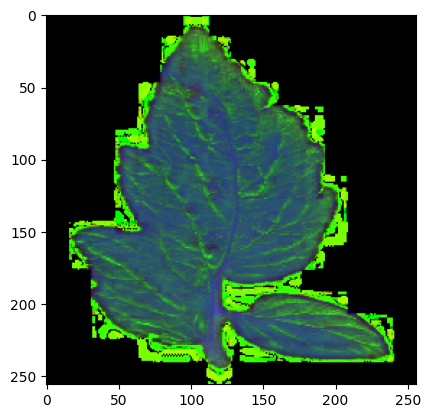

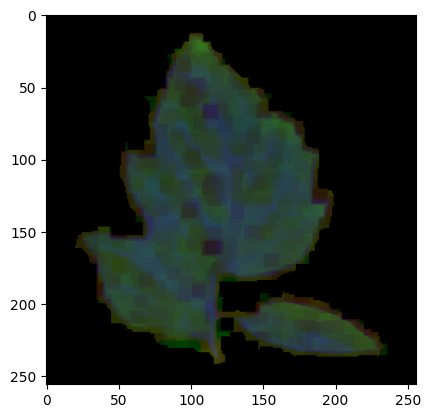

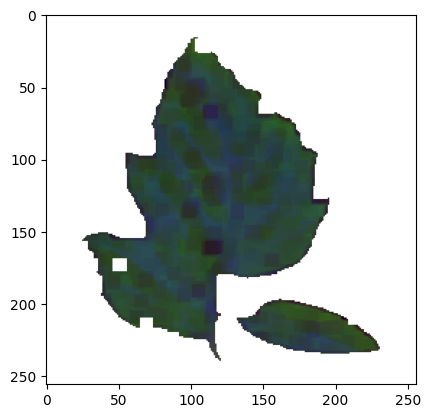

In [158]:
test_img = cv2.imread('tomato/segmented/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110_final_masked.jpg', cv2.IMREAD_COLOR)
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2HSV)
plt.imshow(test_img)
plt.show()
plt.imshow(cv2.erode(test_img,kernel,iterations=2), cmap='gray')
plt.show()
test_img = cv2.erode(test_img,kernel,iterations=2)
lower_black = np.array([0, 0, 0])
upper_black = np.array([179, 255, 30])

# Create a binary mask for non-black pixels
non_black_mask = cv2.inRange(test_img, lower_black, upper_black)

# Set non-black pixels to white
test_img[non_black_mask != 0] = [255, 255, 255]
plt.imshow(test_img, cmap='gray')

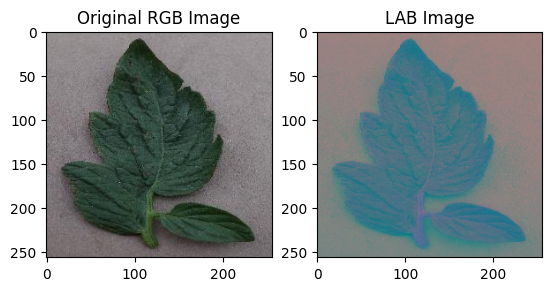

In [135]:
image_rgb = cv2.imread('tomato/colour/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG', cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)  # OpenCV loads images in BGR format, so convert to RGB

# Convert RGB image to LAB color space
image_lab = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2LAB)

# Visualize the original RGB and LAB images
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original RGB Image')

plt.subplot(1, 2, 2)
plt.imshow(image_lab)
plt.title('LAB Image')

plt.show()

array([[[100, 130, 129],
        [100, 130, 129],
        [100, 130, 129],
        ...,
        [100, 131, 128],
        [100, 131, 128],
        [100, 131, 128]],

       [[100, 130, 129],
        [100, 130, 129],
        [100, 130, 129],
        ...,
        [100, 131, 128],
        [100, 131, 128],
        [100, 131, 128]],

       [[100, 130, 129],
        [100, 130, 129],
        [100, 130, 129],
        ...,
        [100, 131, 128],
        [100, 131, 128],
        [100, 131, 128]],

       ...,

       [[100, 132, 129],
        [100, 132, 129],
        [100, 132, 129],
        ...,
        [100, 131, 128],
        [100, 131, 128],
        [100, 131, 128]],

       [[100, 132, 129],
        [100, 132, 129],
        [100, 132, 129],
        ...,
        [100, 131, 128],
        [100, 131, 128],
        [100, 131, 128]],

       [[100, 132, 129],
        [100, 132, 129],
        [100, 132, 129],
        ...,
        [100, 131, 128],
        [100, 130, 128],
        [100, 131, 128]]

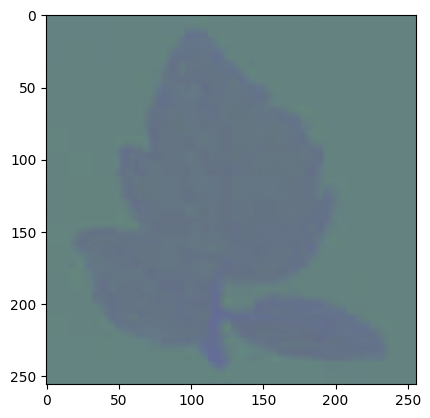

In [146]:
img_lab = image_lab
img_lab[...,0] = 100
plt.imshow(img_lab, cmap='gray')
img_lab

In [138]:
image_lab

array([[[153, 130, 129],
        [155, 130, 129],
        [157, 130, 129],
        ...,
        [163, 131, 128],
        [161, 131, 128],
        [160, 131, 128]],

       [[156, 130, 129],
        [156, 130, 129],
        [158, 130, 129],
        ...,
        [162, 131, 128],
        [162, 131, 128],
        [162, 131, 128]],

       [[158, 130, 129],
        [158, 130, 129],
        [158, 130, 129],
        ...,
        [161, 131, 128],
        [162, 131, 128],
        [162, 131, 128]],

       ...,

       [[121, 132, 129],
        [118, 132, 129],
        [117, 132, 129],
        ...,
        [119, 131, 128],
        [117, 131, 128],
        [124, 131, 128]],

       [[122, 132, 129],
        [119, 132, 129],
        [118, 132, 129],
        ...,
        [123, 131, 128],
        [123, 131, 128],
        [123, 131, 128]],

       [[122, 132, 129],
        [118, 132, 129],
        [118, 132, 129],
        ...,
        [129, 131, 128],
        [128, 130, 128],
        [119, 131, 128]]

In [51]:
arr = np.asarray(img).copy()
arr.shape
img.mode

'1'

In [54]:
import matplotlib
image = matplotlib.image.imread('tomato/segmented_bw/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110_final_masked.jpg')
print(image.dtype)
print(image.shape)

uint8
(256, 256)


In [199]:
#total number of images in all folders together

def get_files_list(base_dir):
    files = []
    for sub_dir in os.listdir(base_dir):
        ls = os.listdir(os.path.join(base_dir,sub_dir))
        for f in ls:
            files.append(os.path.join(base_dir,sub_dir,f))
    return files

In [200]:
raw_dir = 'tomato/colour/'
seg_dir = 'tomato/segmented_bw/'

In [201]:
raw_files_list = get_files_list(raw_dir)
seg_files_list = get_files_list(seg_dir)

X = np.zeros((len(raw_files_list), IMG_HEIGHT, IMG_WIDHT, IMG_CHANNELS), dtype=np.float32)
Y = np.zeros((len(seg_files_list), IMG_HEIGHT, IMG_WIDHT, 1), dtype=np.float32)

In [202]:
X.shape

(12430, 256, 256, 3)

In [203]:
Y.shape

(12430, 256, 256, 1)

In [105]:
# for n,id_ in tqdm(enumerate(raw_files_list),total=len(raw_files_list)):
#     img = imread(id_)[:,:,:IMG_CHANNELS]
#     img = resize(img, (IMG_HEIGHT, IMG_WIDHT), mode='constant', preserve_range=True)
#     # img = rgb2lab(img)
#     img = img/255.0
#     X[n] = img

100%|██████████| 12430/12430 [12:25<00:00, 16.68it/s]


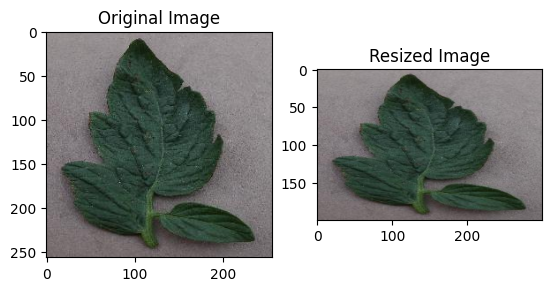

In [204]:
image = cv2.imread('tomato/colour/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG', cv2.IMREAD_COLOR)

# Define the new dimensions for the resized image
new_width = 300
new_height = 200

# Resize the image using cv2.resize
resized_image = cv2.resize(image, (new_width, new_height))

# Visualize the original and resized images
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')

plt.show()

In [206]:
def pre_process_imgs(image_bgr):

    image_bgr = cv2.resize(image_bgr, (IMG_HEIGHT, IMG_WIDHT))
    image_lab = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2LAB)

    # Separate LAB channels
    l_channel, a_channel, b_channel = cv2.split(image_lab)

    # Normalize LAB channels to the range [0, 1]
    l_channel_norm = l_channel / 255.0
    a_channel_norm = (a_channel + 128) / 255.0  # Shift a* component to [0, 255]
    b_channel_norm = (b_channel + 128) / 255.0  # Shift b* component to [0, 255]

    # Merge normalized LAB channels back into LAB image
    image_lab_norm = cv2.merge([l_channel_norm, a_channel_norm, b_channel_norm])
    return image_lab_norm

In [207]:
for n,id_ in tqdm(enumerate(raw_files_list),total=len(raw_files_list)):
    img = cv2.imread(id_, cv2.IMREAD_COLOR)
    img = pre_process_imgs(img)
    X[n] = img

100%|██████████| 12430/12430 [01:40<00:00, 124.15it/s]


In [ ]:
# for n,id_ in tqdm(enumerate(raw_files_list),total=len(raw_files_list)):
#     img = imread(id_)[:,:,:IMG_CHANNELS]
#     img = resize(img, (IMG_HEIGHT, IMG_WIDHT), mode='constant', preserve_range=True)
#     # img = rgb2lab(img)
#     img = img/255.0
#     X[n] = img

In [208]:
# for n,id_ in tqdm(enumerate(seg_files_list),total=len(seg_files_list)):
#     img = imread(id_)
#     img = np.expand_dims(resize(img, (IMG_HEIGHT, IMG_WIDHT), mode='constant', preserve_range=True), axis=-1)
#     img = img/255.0
#     Y[n] = img

In [209]:
for n,id_ in tqdm(enumerate(seg_files_list),total=len(seg_files_list)):
    img = cv2.imread(id_, cv2.IMREAD_GRAYSCALE)
    img = np.expand_dims(cv2.resize(img, (IMG_HEIGHT, IMG_WIDHT)), axis=-1)
    img = img/255.0
    Y[n] = img

100%|██████████| 12430/12430 [00:44<00:00, 280.01it/s]


In [210]:
Y.shape

(12430, 256, 256, 1)

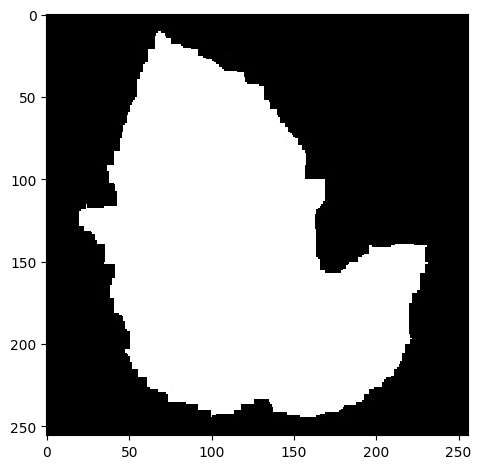

In [211]:
imshow(Y[1])

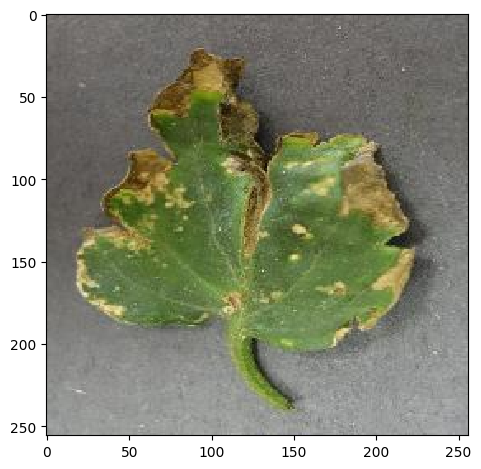

In [59]:
imshow(X[2])

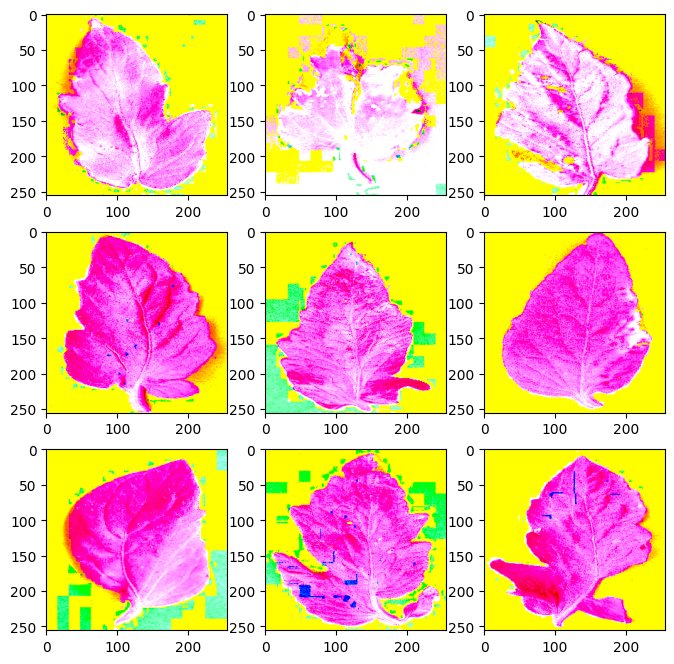

In [218]:
fig = plt.figure(figsize=(8, 8))
for i in range(1, 3*3 +1):
    img = X[i]
    l_channel, a_channel, b_channel = cv2.split(img)

    # Normalize LAB channels to the range [0, 1]
    l_channel_norm = l_channel * 255.0
    a_channel_norm = a_channel * 255 - 128 # Shift a* component to [0, 255]
    b_channel_norm = b_channel * 255 - 128  # Shift b* component to [0, 255]
    img = cv2.merge([l_channel_norm, a_channel_norm, b_channel_norm])
    fig.add_subplot(3, 3, i)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_LAB2BGR))
    # plt.imshow(img)

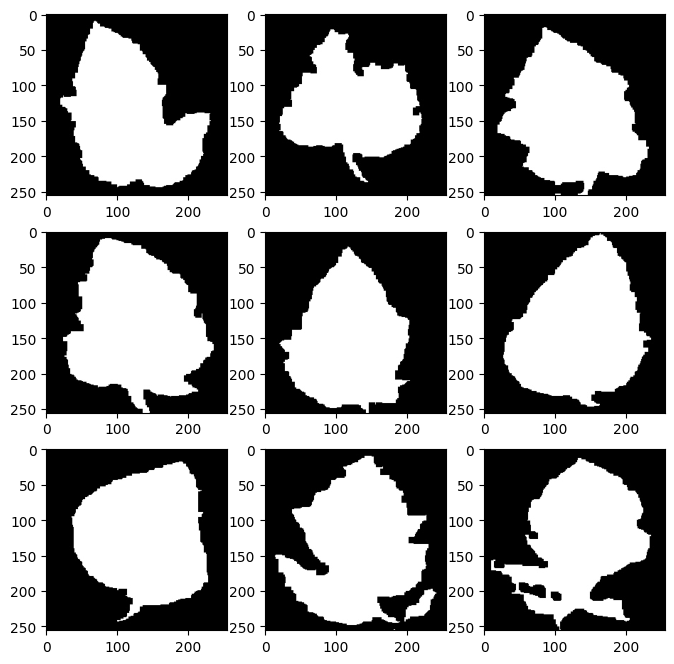

In [215]:
fig = plt.figure(figsize=(8, 8))
for i in range(1, 3*3 +1):
    img = Y[i]
    fig.add_subplot(3, 3, i)
    plt.imshow(img, cmap='gray')

In [219]:
def build_UNet(IMG_HEIGHT, IMG_WIDHT, IMG_CHANNELS):
    inputs = tf.keras.layers.Input((IMG_WIDHT, IMG_HEIGHT, IMG_CHANNELS))
    # s = tf.keras.layers.Lambda(lambda x:x/255)(inputs)
    #layer 1
    c1 = Conv2D(16,(3,3), activation = 'relu', padding='same')(inputs)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16,(3,3), activation = 'relu', padding='same')(c1)
    p1 = MaxPooling2D((2,2))(c1)

    #layer 2
    c2 = Conv2D(32,(3,3), activation = 'relu', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32,(3,3), activation = 'relu', padding='same')(c2)
    p2 = MaxPooling2D((2,2))(c2)

    #layer 3
    c3 = Conv2D(64,(3,3), activation = 'relu', padding='same')(p2)
    c3 = Dropout(0.1)(c3)
    c3 = Conv2D(64,(3,3), activation = 'relu', padding='same')(c3)
    p3 = MaxPooling2D((2,2))(c3)

    #layer 4
    c4 = Conv2D(128, (3, 3), activation='relu',  padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu',  padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    #layer 5
    c5 = Conv2D(256, (3, 3), activation='relu',  padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu',  padding='same')(c5)

    #Expansive path 
    #layer 6
    u6 = UpSampling2D(size=(2,2), data_format="channels_last")(c5)
    # u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu',  padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu',  padding='same')(c6)
     
    #layer 7 
    u7 = UpSampling2D(size=(2,2), data_format="channels_last")(c6)
    # u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu',  padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu',  padding='same')(c7)
    
    #layer 8 
    u8 = UpSampling2D(size=(2,2), data_format="channels_last")(c7)
    # u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu',  padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu',  padding='same')(c8)
    
    #layer 9
    u9 = UpSampling2D(size=(2,2), data_format="channels_last")(c8)
    # u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu',  padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu',  padding='same')(c9)
     
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.models.Model(inputs = inputs, outputs=outputs)

    return model



In [220]:
x_train, x_test, y_train, y_test = train_test_split(X,Y , random_state=42,test_size=0.3, shuffle=True)

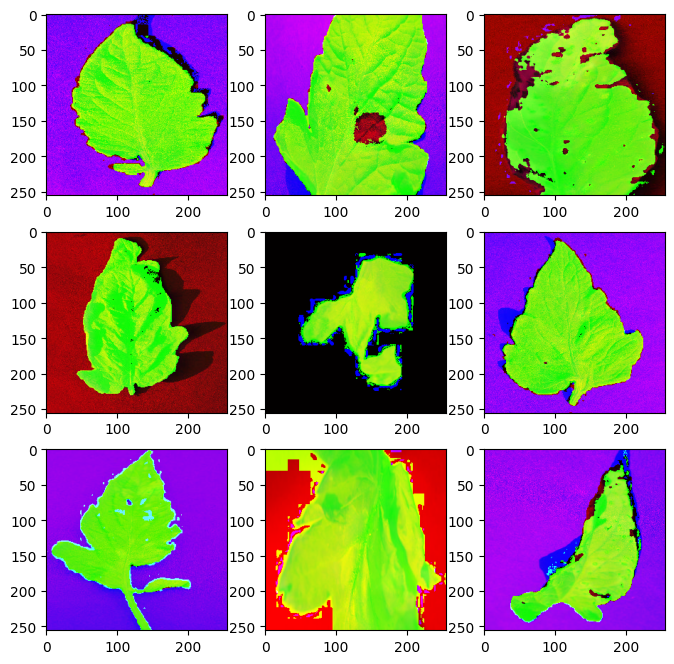

In [221]:
fig = plt.figure(figsize=(8, 8))
for i in range(1, 3*3 +1):
    img = x_train[i]
    fig.add_subplot(3, 3, i)
    plt.imshow(img)

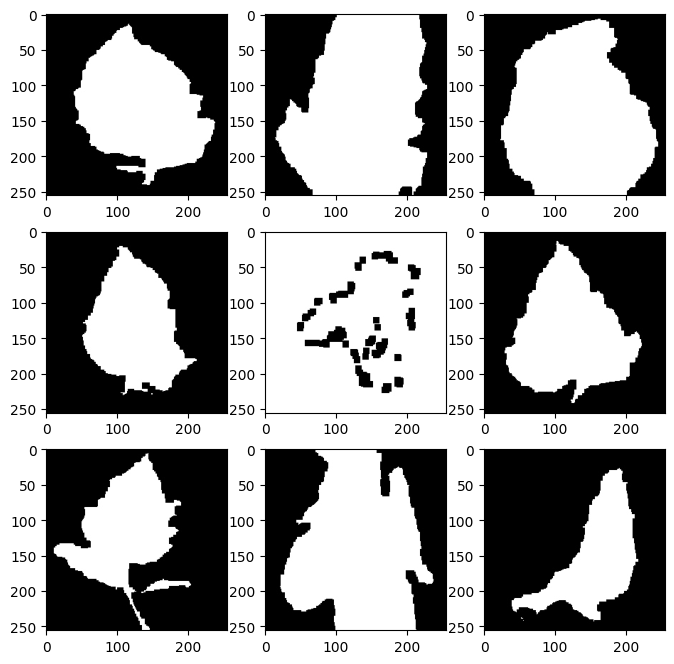

In [223]:
fig = plt.figure(figsize=(8, 8))
for i in range(1, 3*3 +1):
    img = y_train[i]
    fig.add_subplot(3, 3, i)
    plt.imshow(img,cmap='gray')

In [224]:
y_train.shape

(8701, 256, 256, 1)

In [225]:
from tensorflow.keras import backend as K

def dice_coef(y_true, y_pred):
    smooth = 1e-15
    y_true_f = tf.keras.layers.Flatten()(y_true)
    y_pred_f = tf.keras.layers.Flatten()(y_pred)
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2.0 * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + 1.0)

def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true,y_pred)

In [226]:
# u_net_pv_tomato_test1 = build_UNet(IMG_HEIGHT, IMG_WIDHT, IMG_CHANNELS)

# u_net_pv_tomato_test1.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

# u_net_pv_tomato_test1.summary()

In [228]:
u_net_pv_tomato_lab1 = build_UNet(IMG_HEIGHT, IMG_WIDHT, IMG_CHANNELS)

u_net_pv_tomato_lab1.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=dice_loss, metrics=[dice_coef])

u_net_pv_tomato_lab1.summary()

Model: "model_27"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_76 (Conv2D)          (None, 256, 256, 16)         448       ['input_5[0][0]']             
                                                                                                  
 dropout_36 (Dropout)        (None, 256, 256, 16)         0         ['conv2d_76[0][0]']           
                                                                                                  
 conv2d_77 (Conv2D)          (None, 256, 256, 16)         2320      ['dropout_36[0][0]']          
                                                                                           

In [230]:
#checkpoints

checkpointer = tf.keras.callbacks.ModelCheckpoint('tomato_lab_1.h5', verbose=1, save_best_only=True)

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='logs_lab1'),
    checkpointer
]

In [75]:
results = u_net_pv_tomato_test1.fit(x_train,y_train, validation_split=0.1, batch_size=16, epochs=50, callbacks=callbacks,verbose=1)

Epoch 1/50
490/490 [==============================] - ETA: 0s - loss: nan - accuracy: 0.4650
Epoch 1: val_loss did not improve from inf
490/490 [==============================] - 3124s 6s/step - loss: nan - accuracy: 0.4650 - val_loss: nan - val_accuracy: 0.5061
Epoch 2/50
490/490 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5069
Epoch 2: val_loss did not improve from inf
490/490 [==============================] - 3452s 7s/step - loss: nan - accuracy: 0.5069 - val_loss: nan - val_accuracy: 0.5061
Epoch 3/50
490/490 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5069
Epoch 3: val_loss did not improve from inf
490/490 [==============================] - 3328s 7s/step - loss: nan - accuracy: 0.5069 - val_loss: nan - val_accuracy: 0.5061


In [231]:
results = u_net_pv_tomato_lab1.fit(x_train,y_train, validation_split=0.1, batch_size=16, epochs=50, callbacks=callbacks,verbose=1)

Epoch 1/50
490/490 [==============================] - ETA: 0s - loss: 0.0751 - dice_coef: 0.9249
Epoch 1: val_loss improved from inf to 0.05722, saving model to tomato_lab_1.h5


c:\Users\I741666\Desktop\blight detection\leaf_seg\blight_env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


490/490 [==============================] - 2568s 5s/step - loss: 0.0751 - dice_coef: 0.9249 - val_loss: 0.0572 - val_dice_coef: 0.9430
Epoch 2/50
490/490 [==============================] - ETA: 0s - loss: 0.0559 - dice_coef: 0.9441
Epoch 2: val_loss improved from 0.05722 to 0.05367, saving model to tomato_lab_1.h5
490/490 [==============================] - 2450s 5s/step - loss: 0.0559 - dice_coef: 0.9441 - val_loss: 0.0537 - val_dice_coef: 0.9466
Epoch 3/50
490/490 [==============================] - ETA: 0s - loss: 0.0536 - dice_coef: 0.9464
Epoch 3: val_loss improved from 0.05367 to 0.05328, saving model to tomato_lab_1.h5
490/490 [==============================] - 2441s 5s/step - loss: 0.0536 - dice_coef: 0.9464 - val_loss: 0.0533 - val_dice_coef: 0.9469
Epoch 4/50
490/490 [==============================] - ETA: 0s - loss: 0.0525 - dice_coef: 0.9475
Epoch 4: val_loss did not improve from 0.05328
490/490 [==============================] - 2420s 5s/step - loss: 0.0525 - dice_coef: 0.94

KeyboardInterrupt: 

In [76]:
im = u_net_pv_tomato_test1.predict(x_train[:5])

1/1 [==============================] - 1s 559ms/step


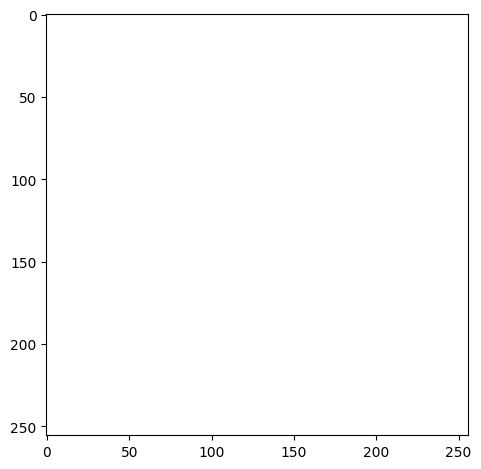

In [81]:
imshow(im[4])

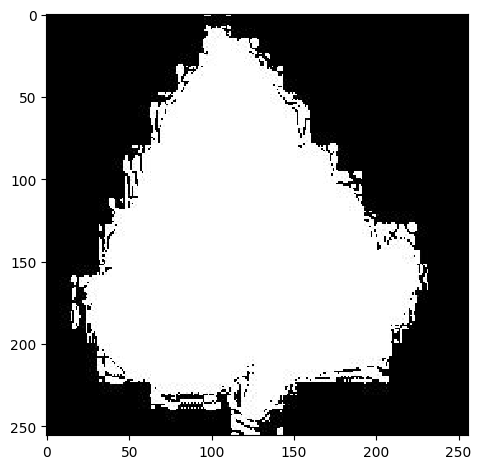

In [78]:
imshow(y_train[6])

In [28]:
preds = u_net_pv_tomato_test1.predict(x_train[4])

NameError: name 'u_net_pv_tomato_test1' is not defined

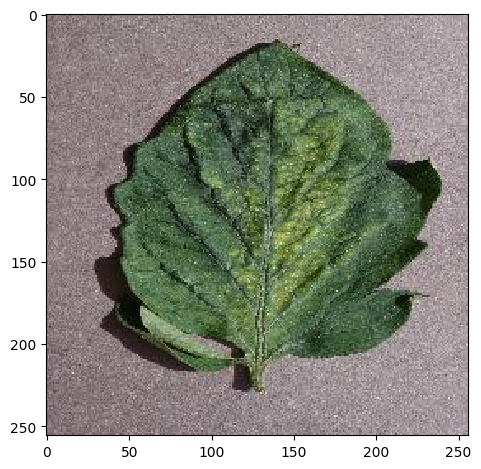

In [100]:
imshow(x_test[1])

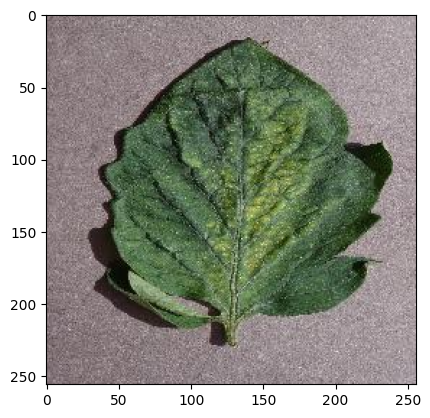

In [97]:
plt.imshow(x_test[1])

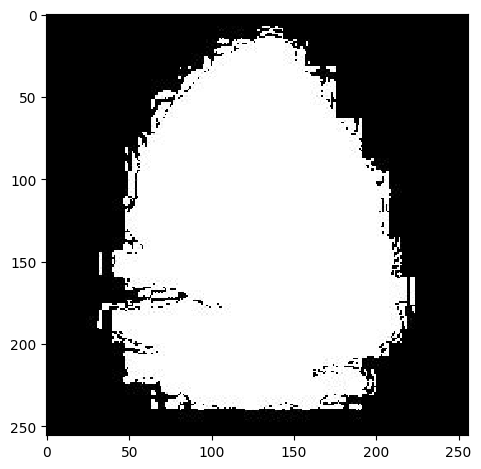

In [101]:
imshow(y_test[1])

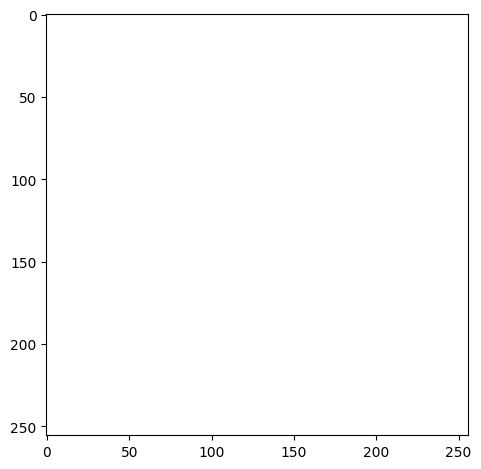

In [104]:
imshow(preds[1])

In [29]:
model = tf.keras.models.load_model('pv_tomato_model_1.h5')

In [ ]:
model.summary()

In [35]:
res = model.predict(x_train[:10])

1/1 [==============================] - 1s 566ms/step


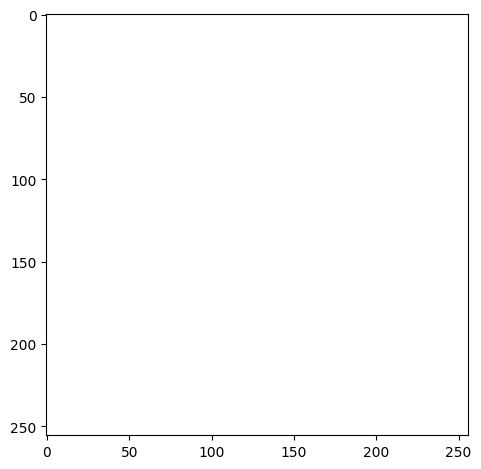

In [48]:
imshow(res[2])

In [88]:
from tensorflow.keras.models import Model
def get_intermediate_outputs(model, layer_names, input_data):
    intermediate_models = [Model(inputs=model.input, outputs=model.get_layer(layer_name).output) for layer_name in layer_names]
    intermediate_outputs = [intermediate_model.predict(input_data) for intermediate_model in intermediate_models]
    return intermediate_outputs

In [86]:
op = u_net_pv_tomato_test1.get_layer('max_pooling2d_8').output

In [90]:
x_train[1].shape

(256, 256, 3)

In [92]:
model = u_net_pv_tomato_test1

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 lambda_2 (Lambda)           (None, 256, 256, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv2d_38 (Conv2D)          (None, 256, 256, 16)         448       ['lambda_2[0][0]']            
                                                                                                  
 dropout_18 (Dropout)        (None, 256, 256, 16)         0         ['conv2d_38[0][0]']           
                                                                                            

In [ ]:
example_input =  x_train[1].reshape((1,256,256,3))


# Specify the layer names for which you want to visualize the outputs
layer_names_to_visualize = ['input_3','lambda_2','conv2d_38','conv2d_39','max_pooling2d_8', 'max_pooling2d_9']

# Get intermediate outputs
intermediate_outputs = get_intermediate_outputs(model, layer_names_to_visualize, example_input)

# Visualize intermediate outputs
for i, layer_name in enumerate(layer_names_to_visualize):
    plt.figure(figsize=(8, 8))
    imshow(intermediate_outputs[i][0, :, :, 0], cmap='viridis')  # Adjust indices as needed
    plt.title(f'Layer: {layer_name} - Output')
    plt.show()

C:\Users\I741666\AppData\Local\Temp\ipykernel_21892\3709651370.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Segmented Image')

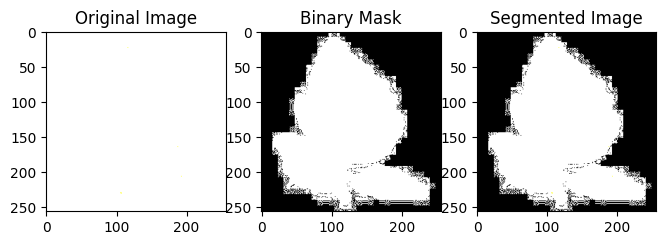

In [111]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your original image (replace 'original_image.jpg' with your image file)
original_image = imread('tomato/colour/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG')
imshow(original_image)
original_image = resize(original_image, (IMG_HEIGHT, IMG_WIDHT), mode='constant', preserve_range=True)

# Load your binary mask (replace 'binary_mask.jpg' with your binary mask file)
binary_mask = cv2.imread('tomato/segmented_bw/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110_final_masked.jpg', cv2.IMREAD_GRAYSCALE)

# Ensure that the binary mask is binary (contains only 0 and 255 values)
binary_mask = (binary_mask > 0).astype(np.uint8)

# Apply the binary mask to the original image
segmented_image = cv2.bitwise_and(original_image, original_image, mask=binary_mask)

# Visualize the original image, binary mask, and segmented image
plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(binary_mask, cmap='gray')
plt.title('Binary Mask')

plt.subplot(1, 3, 3)
plt.imshow(segmented_image)
plt.title('Segmented Image')